<a href="https://colab.research.google.com/github/shubigsh/sentimental-analysis/blob/main/Sentimental_Analysis_on_climate_change_using_twitter_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
# Install missing dependencies (if needed)
!pip install vaderSentiment textblob

# Import necessary libraries
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load dataset
file_path = "/content/your_dataset.csv"  # Change to actual file path
df = pd.read_csv("/content/test_data.zip", encoding='latin-1')

# Display column names to verify
print("Dataset Columns:", df.columns)

# Fix column names based on your dataset
df.rename(columns={
    'Tweet': 'text',
    'Labels (1 - positive and 0 - negative)': 'binary_label',
    '\nLabels (1 - positive, 0 - negative and 0.5 neutral)\n': 'multi_label'
}, inplace=True)

# Drop unnecessary columns
df = df[['text', 'multi_label']].dropna()

# Convert multi_label to numerical sentiment values
df['multi_label'] = df['multi_label'].astype(str).str.strip()  # Clean column
sentiment_mapping = {'1': 'positive', '0': 'negative', '0.5': 'neutral'}
df['multi_label'] = df['multi_label'].map(sentiment_mapping)

# Preprocessing function
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'@\w+|\#', '', text)  # Remove mentions and hashtags
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text.strip()

# Apply text preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

# Sentiment analysis using Vader
vader_analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    scores = vader_analyzer.polarity_scores(text)
    return 'positive' if scores['compound'] > 0 else 'negative' if scores['compound'] < 0 else 'neutral'

df['vader_sentiment'] = df['clean_text'].apply(get_vader_sentiment)

# Sentiment analysis using TextBlob
def get_textblob_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    return 'positive' if score > 0 else 'negative' if score < 0 else 'neutral'

df['textblob_sentiment'] = df['clean_text'].apply(get_textblob_sentiment)

# Map textblob sentiment to numerical values for SVM
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
df['sentiment'] = df['textblob_sentiment'].map(sentiment_mapping)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print(report)


Dataset Columns: Index(['Unnamed: 0', 'Tweet', 'Unnamed: 2',
       'Labels (1 - positive and 0 - negative)',
       '\nLabels (1 - positive, 0 - negative and 0.5 neutral)\n'],
      dtype='object')
Model Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.43      1.00      0.60         3
           1       1.00      0.33      0.50         6

    accuracy                           0.56         9
   macro avg       0.71      0.67      0.55         9
weighted avg       0.81      0.56      0.53         9



SVM


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...



SVM Model Accuracy: 0.7359198998748435

Classification Report:
               precision    recall  f1-score   support

          -1       0.76      0.49      0.60       784
           0       0.64      0.45      0.52      1582
           1       0.74      0.88      0.80      4514
           2       0.78      0.74      0.76      1909

    accuracy                           0.74      8789
   macro avg       0.73      0.64      0.67      8789
weighted avg       0.73      0.74      0.72      8789



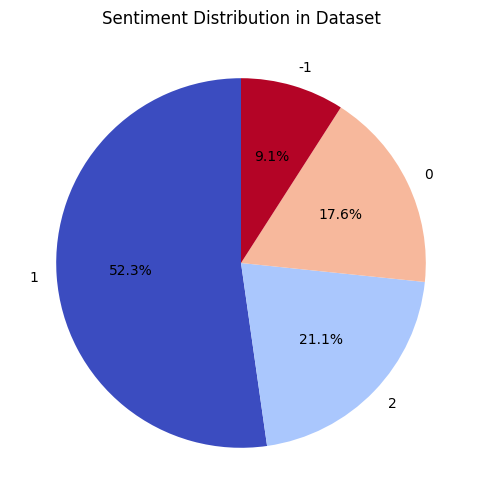

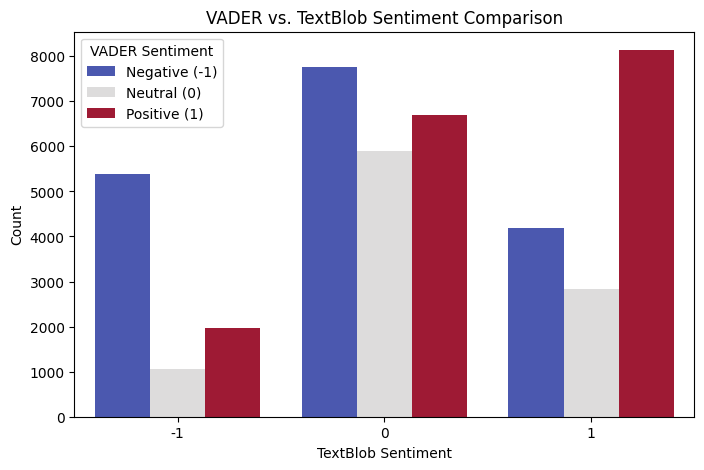

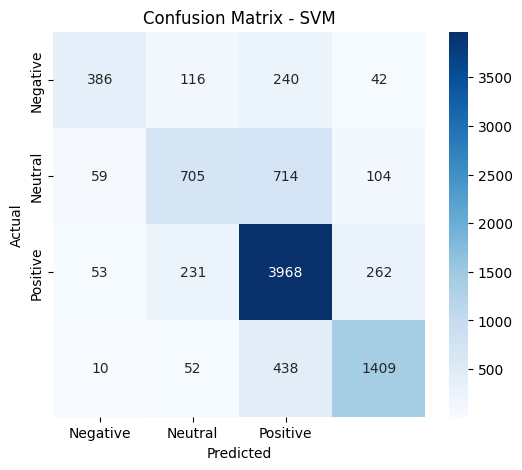

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download necessary NLTK data
nltk.download('vader_lexicon')


df = pd.read_csv("/content/twitter_sentiment_data.csv.zip")

if "message" not in df.columns:
    raise KeyError("Column 'message' not found in dataset!")

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text.lower()

df["cleaned_text"] = df["message"].astype(str).apply(clean_text)

df["textblob_polarity"] = df["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)

sia = SentimentIntensityAnalyzer()
df["vader_score"] = df["cleaned_text"].apply(lambda x: sia.polarity_scores(x)['compound'])

def get_sentiment_label(score):
    if score > 0:
        return 1  # Positive
    elif score < 0:
        return -1  # Negative
    else:
        return 0  # Neutral

df["textblob_sentiment"] = df["textblob_polarity"].apply(get_sentiment_label)
df["vader_sentiment"] = df["vader_score"].apply(get_sentiment_label)

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["cleaned_text"])
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nSVM Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

df.to_csv("processed_sentiment_data.csv", index=False)

plt.figure(figsize=(6, 6))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap="coolwarm")
plt.title("Sentiment Distribution in Dataset")
plt.ylabel("")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='textblob_sentiment', hue='vader_sentiment', palette='coolwarm')
plt.title("VADER vs. TextBlob Sentiment Comparison")
plt.xlabel("TextBlob Sentiment")
plt.ylabel("Count")
plt.legend(title="VADER Sentiment", labels=["Negative (-1)", "Neutral (0)", "Positive (1)"])
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
